In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\raghu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def relu(x):
    return np.maximum(0,x)

def leaky_relu(x,alpha=0.01):
    return np.where(x>0,x,alpha*x)

def tanh(x):
    return np.tanh(x)

In [4]:
X=np.linspace(-10,10,100)

In [5]:
X

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

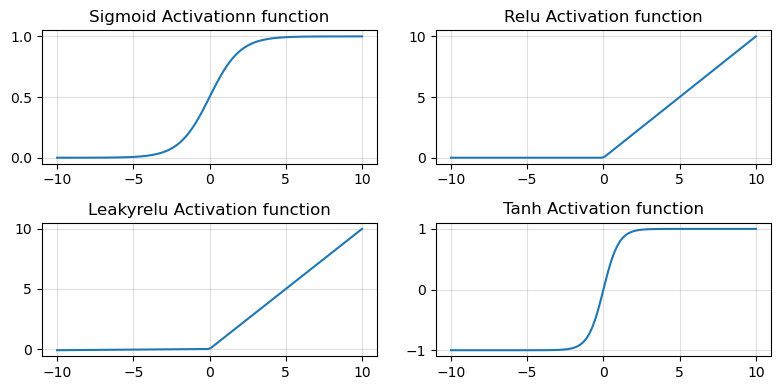

In [6]:
# lets plot the graphs
plt.figure(figsize=(8,4))

plt.subplot(2,2,1)
plt.plot(X,sigmoid(X))
plt.title("Sigmoid Activationn function")
plt.grid(True,alpha=0.4)

plt.subplot(2,2,2)
plt.plot(X,relu(X))
plt.title("Relu Activation function")
plt.grid(True,alpha=0.4)

plt.subplot(2,2,3)
plt.plot(X,leaky_relu(X))
plt.title("Leakyrelu Activation function")
plt.grid(True,alpha=0.4)

plt.subplot(2,2,4)
plt.plot(X,tanh(X))
plt.title("Tanh Activation function")
plt.grid(True,alpha=0.4)

plt.tight_layout() #each graph will be equal distance 




In [17]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(32,activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='tanh'),
    tf.keras.layers.Dense(1,activation='linear')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Generate data
#productivity score
np.random.seed(1)
x=np.random.rand(1000,3)*np.array([24,10,60])
y=np.random.rand(1000)*100

In [9]:
len(x)

1000

In [10]:
np.random.seed(1)
np.random.rand(1,2)


array([[0.417022  , 0.72032449]])

In [11]:
import pandas as pd
def display_dataset(x,y,n=10):
    df=pd.DataFrame(x,columns=["sleep(hours)","coffee(cups)","Travel(minutes)"])
    df['productivity']=y
    print(df.head(n))
display_dataset(x,y)

   sleep(hours)  coffee(cups)  Travel(minutes)  productivity
0     10.008528      7.203245         0.006862     79.348467
1      7.255982      1.467559         5.540316      3.587915
2      4.470245      3.455607        23.806048     19.135888
3     12.931602      4.191945        41.113170     97.745556
4      4.906854      8.781174         1.643256     96.079731
5     16.091220      4.173048        33.521390     55.659166
6      3.369287      1.981015        48.044674     64.609072
7     23.238278      3.134242        41.539357     27.209301
8     21.033340      8.946067         5.102653     95.209109
9      0.937315      1.698304        52.688550     66.977481


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# neural network in keras

# functional api
def create_custom_model():
    #input_layer
    inputs=keras.Input(shape=(3,))
    #hidden layer
    x=layers.Dense(2,activation='sigmoid')(inputs)
    #output layer
    outputs=layers.Dense(1,activation='linear')(x)
    
    model=keras.Model(inputs=inputs,outputs=outputs)
    return model

model=create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss='mean_squared_error')

In [13]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# train the  network
history=model.fit(x,y,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3482.4624 - val_loss: 3675.0029
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3194.8879 - val_loss: 3622.6484
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3200.3806 - val_loss: 3570.8313
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3263.5054 - val_loss: 3519.2344
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3071.0156 - val_loss: 3465.0901
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3118.3040 - val_loss: 3325.4695
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2861.3479 - val_loss: 3224.1555
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2849.0527 - val_loss: 3134.9138
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2759.5186 - val_loss: 3053.9788
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2580.3181 - val_loss: 2978.7000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2675.3677 - val_loss: 2905.68

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 961.6491 - val_loss: 1086.9108
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 981.5197 - val_loss: 1075.4834
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 968.0306 - val_loss: 1065.1893
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 909.9667 - val_loss: 1054.8668
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 941.9792 - val_loss: 1044.8958
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 924.5936 - val_loss: 1036.1193
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 940.8678 - val_loss: 1026.6581
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 927.7543 - val_loss: 1018.6071
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 986.6664 - val_loss: 1010.0193
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 926.5317 - val_loss: 1001.9503
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 912.6874 - val_loss: 994.5067
Epoch 77/100


In [15]:
#evaluate model
test_loss=model.evaluate(x,y,verbose=1)
test_loss

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 878.7612  


853.6611328125